# Mục tiêu đồ án


1.   Dự báo về tình trạng khách hàng, cho phép các công ty thực hiện các biện pháp chủ động để giữ chân những khách hàng gặp rủi ro.





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

In [17]:
# from google.colab import files
# uploaded=files.upload()

In [18]:
df=pd.read_csv("D:/Machine Learning/thuc hanh/datasets/customer_churn_dataset-testing-master.csv/customer_churn.csv")
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1



**Mục đích đồ án:**

**Dự** báo về tình trạng khách hàng, cho phép các công ty thực hiện các biện pháp chủ động để giữ chân những khách hàng gặp rủi ro.




# **Tiền xử lí dữ liệu**


1.   Làm sạch dữ liệu
2.   Tích hợp dữ liêu
3.   Chuyển đổi dữ liệu
4. Giảm chiều dữ liệu




## Giới thiệu dữ liệu

*CustomerID*: Số duy nhất đại diện cho mỗi khách hàng.

*Age*: Tuổi của khách hàng.

*Gender*: Giới tính của khách hàng (có giá trị 'Male' hoặc 'Female').

*Tenure*: Thời gian sử dụng hoặc khách hàng đã làm việc với doanh nghiệp trong bao lâu (tính theo tháng)

*Usage Frequency*: Tần suất sử dụng sản phẩm hoặc dịch vụ.

*Support Calls*: Số lượng cuộc gọi hỗ trợ đã được thực hiện bởi khách hàng.

*Payment Delay*: Thời gian trễ thanh toán (đo bằng đơn vị nào đó, có thể là ngày).

*Subscription Type*: Loại đăng ký của khách hàng (ví dụ: 'Basic', 'Standard', 'Premium').

*Contract Length*: Thời hạn hợp đồng của khách hàng (ví dụ: 'Monthly', 'Annual', 'Quarterly').

*Total Spend*: Tổng chi tiêu của khách hàng.

*Last Interaction*: Thời điểm tương tác cuối cùng của khách hàng.

*Churn*: Biến target, có giá trị 0(Chưa chấm dựt dịch vụ) hoặc 1(Đã chấm dứt dịch vụ).



## 1.   Làm sạch dữ liệu




### Kiểm tra giá trị trùng lặp

In [19]:
# kiểm tra giá trị trùng lặp
df.duplicated().sum()

0

### Xử lí giá trị thiếu

In [20]:
# Tìm missing values
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

### Loại bỏ cột không cần thiết

In [21]:
# loại bỏ các cột không cần thiết
df = df.drop(columns = 'CustomerID')
df


,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...
64369,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,50,Female,18,19,7,22,Standard,Monthly,540,13,1


### Xử lý các giá trị ngoại lệ

In [22]:
# xu li du lieu nhiễu
df.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


Text(0.5, 0, 'Total Spend')

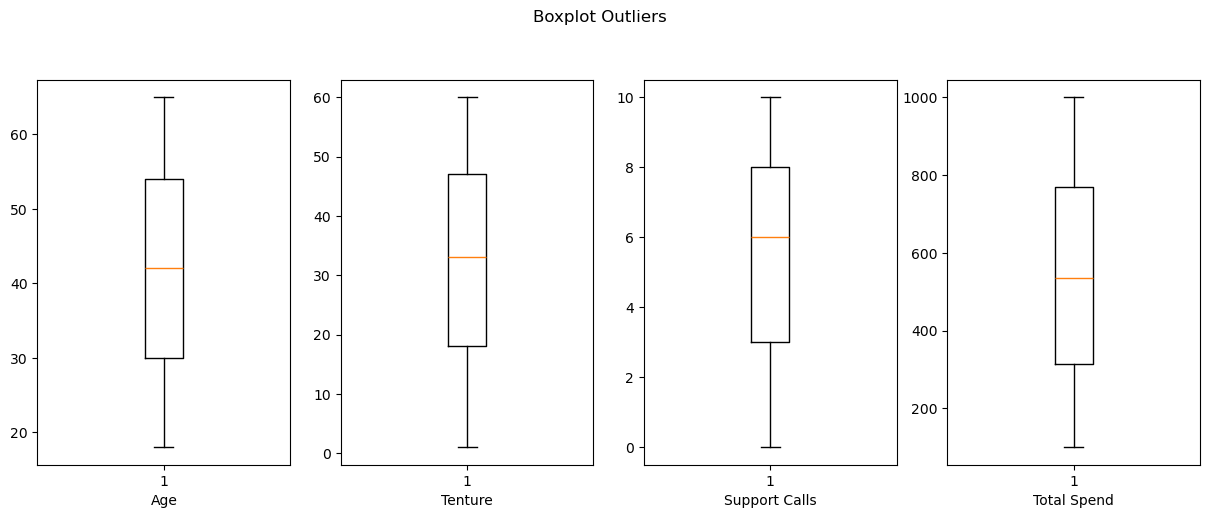

In [23]:

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

fig.suptitle('Boxplot Outliers', y=1.02)

axes[0].boxplot(df['Age'])
axes[0].set_xlabel('Age')

axes[1].boxplot(df['Tenure'])
axes[1].set_xlabel('Tenture')

axes[2].boxplot(df['Support Calls'])
axes[2].set_xlabel('Support Calls')

axes[3].boxplot(df['Total Spend'])
axes[3].set_xlabel('Total Spend')


## Tích hợp dữ liệu

## Chuyển đổi dữ liệu

### Chuyển hóa dữ liệu

In [27]:
# Chuyển đổi các thuộc tính categorical thành dạng số

# gioi tinh
df['Gender']=LabelEncoder().fit_transform(df['Gender'])

# loai dang ki
df['Subscription Type']=LabelEncoder().fit_transform(df['Subscription Type'])

# loai thanh toan
df['Contract Length']=LabelEncoder().fit_transform(df['Contract Length'])





### Chuẩn hóa dữ liệu

In [28]:
# cac cot can chuan hoa
columns_to_normalize = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction','Churn']
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


# Trực quan hóa dữ liệu trước PTDL

In [9]:
# loc ra khach hang chua ngung dung dich vu
churn_0=df[df['Churn']==0]

# loc ra khach hang da ngung dung dich vu
churn_1=df[df['Churn']==1]

# Thống kê số lượng nam và nữ
gender_counts=df['Gender'].value_counts()

## Biểu đồ cột

So sánh số lượng khách hàng ngưng sử dụng và tiếp tục sử dụng

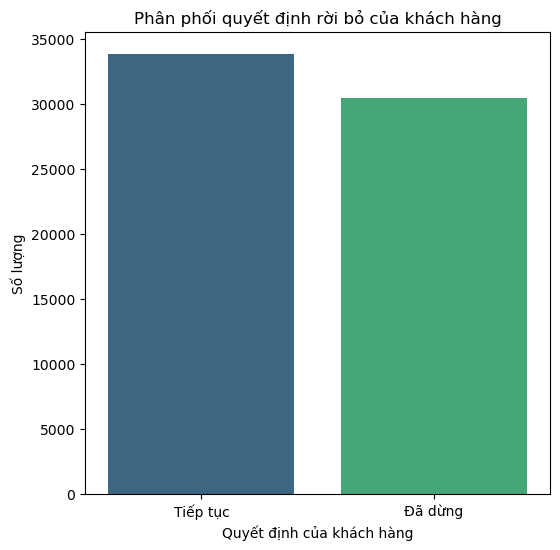

In [11]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Churn', palette='viridis')
plt.xlabel('Quyết định của khách hàng')
plt.ylabel('Số lượng')
plt.title('Phân phối quyết định rời bỏ của khách hàng')
plt.xticks([0, 1], ['Tiếp tục', 'Đã dừng'])
plt.show()

Loại đăng ký của khách hàng theo giới tính và loại đăng kí của những khách đã ngưng sử dụng theo giới tính



Text(0.5, 1.0, 'Churn Subscription Type Distribution by Gender')

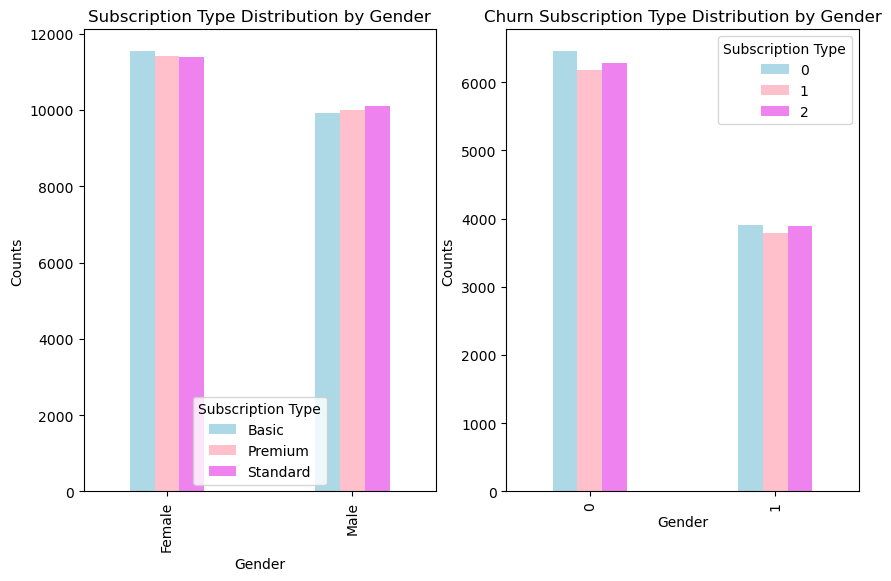

In [24]:
# Tính toán số lượng từng loại Subscription Type theo giới tính
gender_subscription_counts = df.groupby(['Gender', 'Subscription Type']).size().unstack(fill_value=0)
gender_subscription_counts_1 = churn_1.groupby(['Gender', 'Subscription Type']).size().unstack(fill_value=0)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
# Vẽ biểu đồ cột ghép
gender_subscription_counts.plot(kind='bar', color=['lightblue', 'pink','violet'],  width=0.4, ax=axes[0])
axes[0].set_ylabel('Counts')
axes[0].set_title('Subscription Type Distribution by Gender')


gender_subscription_counts_1.plot(kind='bar', color=['lightblue', 'pink','violet'],  width=0.4, ax=axes[1])
axes[1].set_ylabel('Counts')
axes[1].set_title('Churn Subscription Type Distribution by Gender')


Các loại đăng kí của nam và nữ đồng đều, không chênh lệch đáng kể.

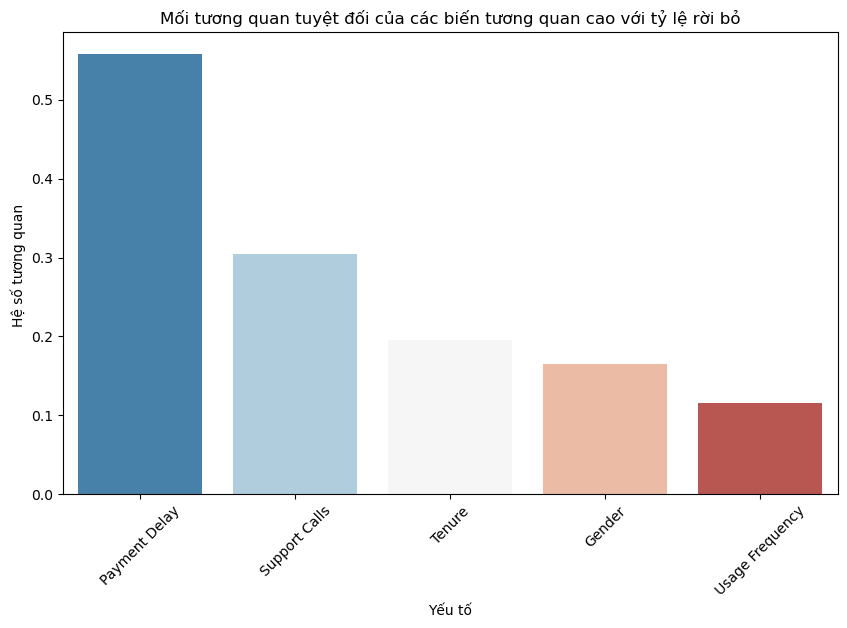

In [29]:
corr_matrix = df.corr()
high_corr_vars = corr_matrix.abs().nlargest(6, 'Churn')['Churn'].index[1:]
high_corr_values = corr_matrix.abs().nlargest(6, 'Churn')['Churn'].values[1:]
plt.figure(figsize=(10, 6))
sns.barplot(x=high_corr_vars, y=high_corr_values, palette='RdBu_r')
plt.ylabel('Hệ số tương quan ')
plt.xlabel('Yếu tố')
plt.title('Mối tương quan tuyệt đối của các biến tương quan cao với tỷ lệ rời bỏ')
plt.xticks(rotation=45)
plt.show()

## Biểu đồ đường

Trực quan nhóm độ tuổi nào chi trả cho dịch vụ của doanh nghiệp

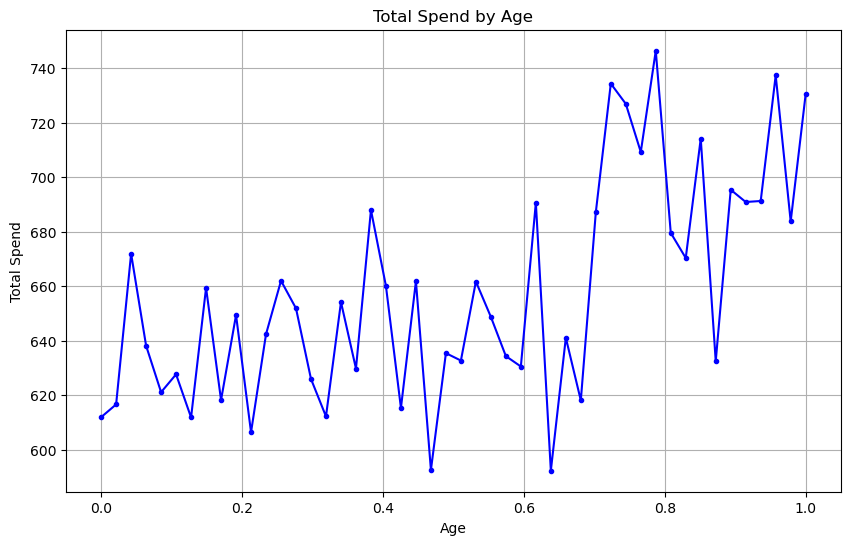

In [23]:
total_spend_by_age = df.groupby('Age')['Total Spend'].sum().reset_index()
# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
plt.plot(total_spend_by_age['Age'], total_spend_by_age['Total Spend'], marker='.', linestyle='-', color='b')
plt.xlabel('Age')
plt.ylabel('Total Spend')
plt.title('Total Spend by Age')
plt.grid(True)
plt.show()

Từ biểu đồ đường dễ dàng nhận thấy nhóm tuổi từ 55-65 chi trả cho dịch vụ của doanh nghiệp nhiều hơn các nhóm còn lại

## Biểu đồ tròn

Thống kê tỉ lệ Nam và Nữ, và tỉ lệ giới tính trong quyết định ngưng sử dụng dịch vụ của doanh nghiệp

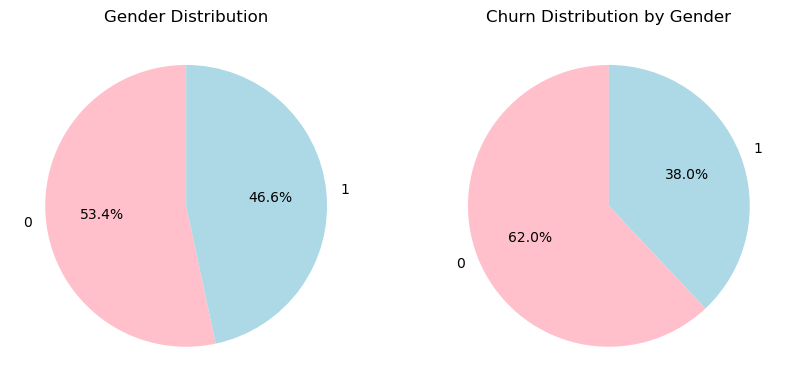

In [30]:
# thống kê số lượng khách hàng nam và nữ
gender_counts=df['Gender'].value_counts()
# thống kê giới tính khách hàng đã ngưng sử dụng dịch vụ
gender_counts_1 = churn_1['Gender'].value_counts()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
# Biểu đồ tròn về phân phối giới tính
axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['pink', 'lightblue'])
axes[0].set_title('Gender Distribution')
# Biểu đồ tròn về tình trạng chấm dứt hợp đồng
axes[1].pie(gender_counts_1, labels=gender_counts_1.index, autopct='%1.1f%%', startangle=90, colors=['pink', 'lightblue'])
axes[1].set_title('Churn Distribution by Gender')
# Hiển thị biểu đồ
plt.show()

## Biểu đồ phân phối tần suất


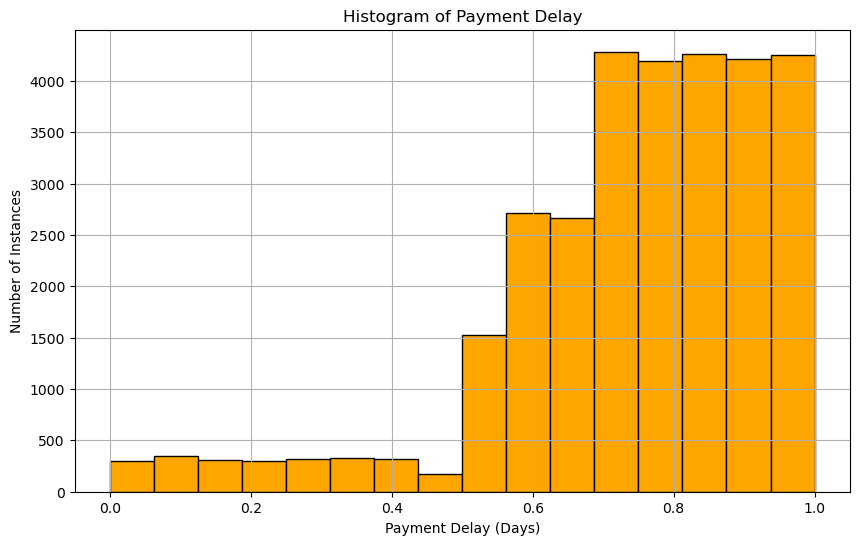

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(churn_1['Payment Delay'], bins=16, color='orange', edgecolor='black')
plt.xlabel('Payment Delay (Days)')
plt.ylabel('Number of Instances')
plt.title('Histogram of Payment Delay')
plt.grid(True)
plt.show()

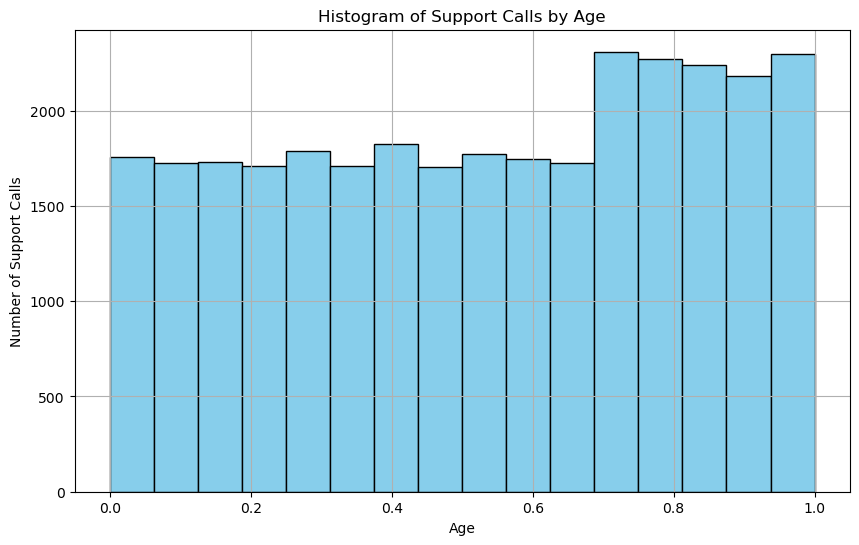

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(churn_1[churn_1['Last Interaction'].notnull()]['Age'], bins=16, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Support Calls')
plt.title('Histogram of Support Calls by Age')
plt.grid(True)
plt.show()

## Biểu đồ mật độ

c:\Users\Asus-FPT\anaconda3\envs\ML01\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


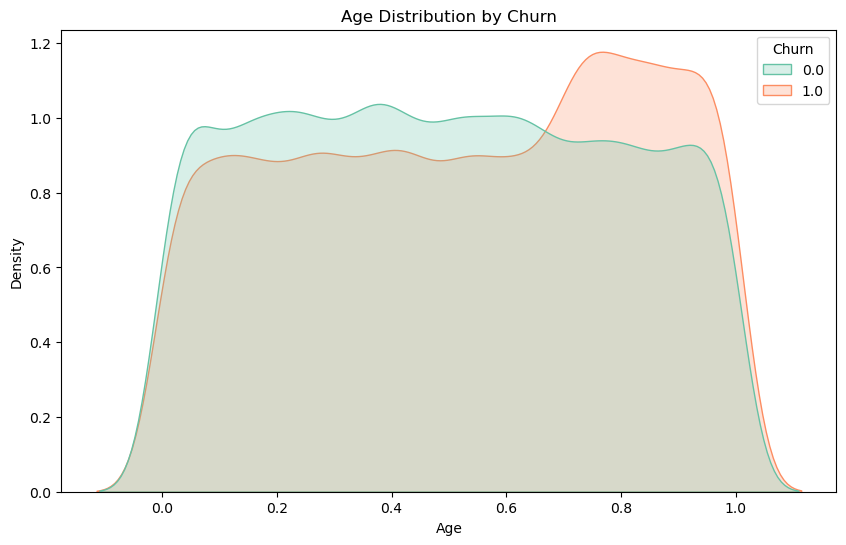

In [33]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', hue='Churn', common_norm=False, fill=True, palette='Set2')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Churn')
plt.show()

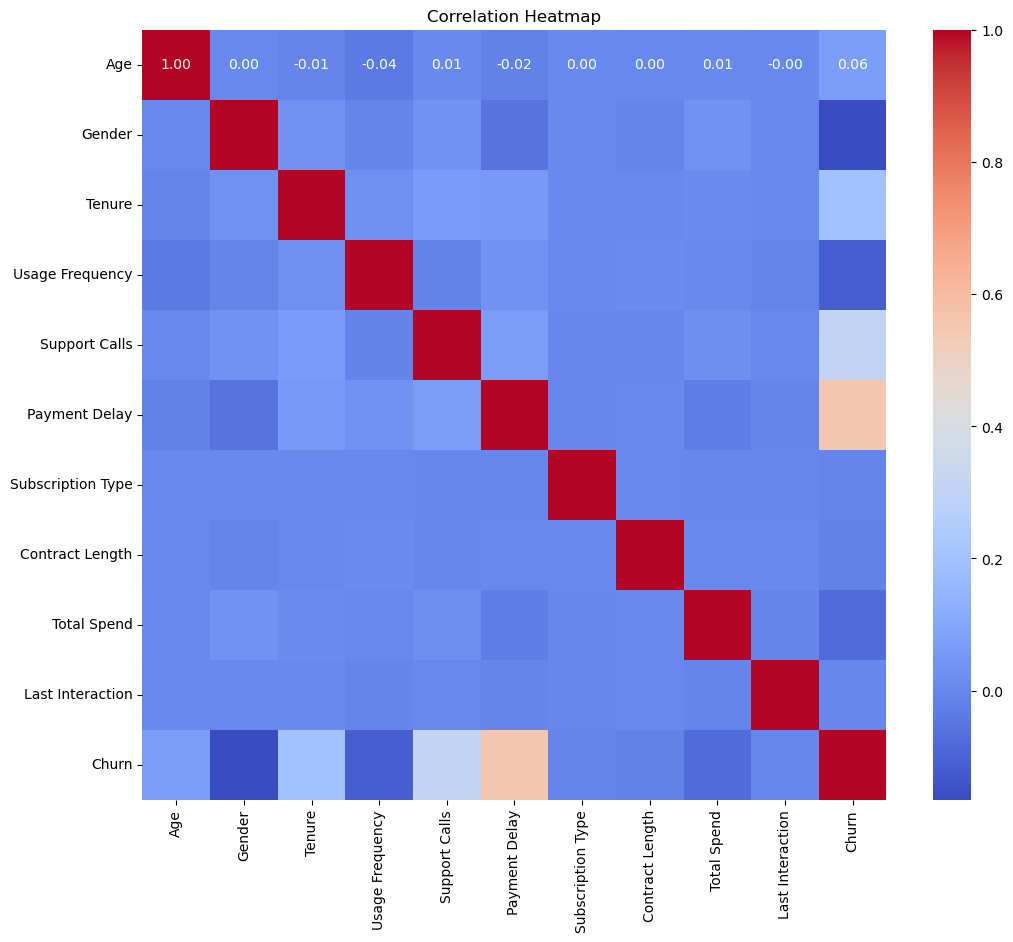

In [34]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Các khoảng tuổi thuộc từ 20-50 đều có chênh lệch tỉ trọng ổn định, đồng đều qua các khoảng. Đặc biệt khoảng tuổi từ 55-65 độ chênh lệch tỉ trọng giữa việc tiếp tục và ngưng sử dụng lớn hơn nhiều so với các khoảng còn lại